# 1.Bayes' Rule

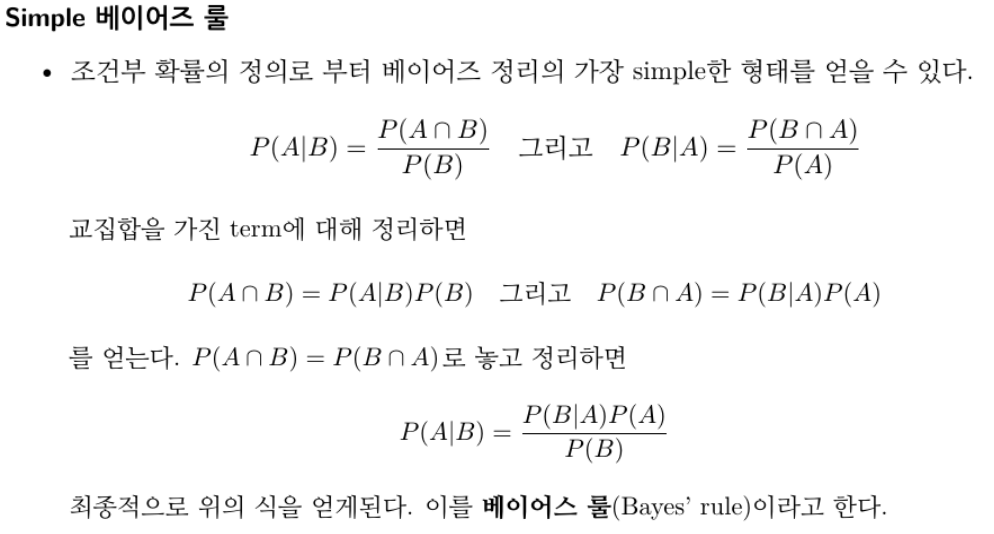

### 1.1 예제1 : 회색 바지를 입은 남자

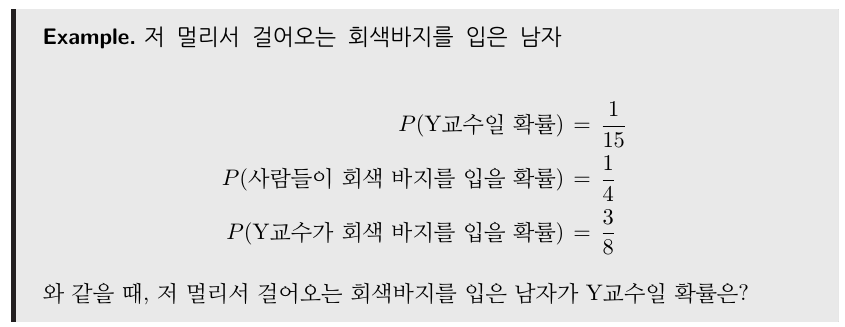

- $Y$ : Y교수일 이벤트

- $G$ : 회색 바지를 입는 이벤트

우리가 아래 확률들은 알고 있다고 하자.

- $p(Y)=1/15$

- $p(G)=1/4$

- $p(G|Y)=3/8$

In [ ]:
################## Fill Your Code! ##################
p_Y = 1/15
p_G = 1/4
p_GY = 3/8
#####################################################

다음 확률은 어떻게 될까?

- $p(Y|G)=?$

In [ ]:
################## Fill Your Code! ##################
p_YG = (p_GY*p_Y)/p_G
#####################################################
print(p_YG)

0.1


### 1.1 예제2 : 흑백 버튼

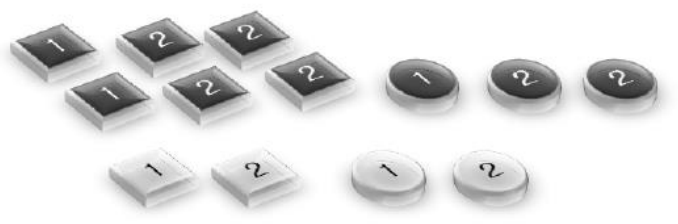

- $B$ : 검정 버튼일 이벤트

- $W$ : 하얀 버튼일 이벤트

- $Bt1$ : 버튼 1일 이벤트

- $Bt2$ : 버튼 2일 이벤트


우리가 아래 확률들은 알고 있다고 하자.

- $p(Bt1)=5/13$

- $p(Bt2)=8/13$

- $p(B|Bt1)=3/5$

- $p(B|Bt2)=6/8$

In [ ]:
################## Fill Your Code! ##################
# p(Bt1)  and   p(Bt2)
p_Bt1 = 5/13
p_Bt2 = 8/13

# p(B|Bt1)  and  p(B|Bt2)
p_B_Bt1 = 3/5
p_B_Bt2 = 6/8
#####################################################

다음 확률은 어떻게 될까?

- $p(Bt1|B)=?$

In [ ]:
################## Fill Your Code! ##################
p_Bt1_B = (p_B_Bt1*p_Bt1)/(p_B_Bt1*p_Bt1 + p_B_Bt2*p_Bt2)
#####################################################
print(p_Bt1_B)

0.33333333333333337


# 2.Measurement Model

### 2.1 예제1 : 문은 몇 퍼센트 확률로 열려있을까? (관측 1회)

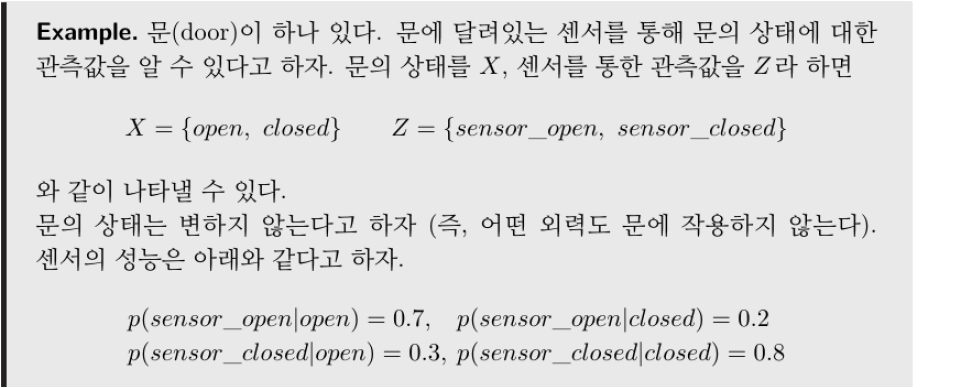

- State set $X = \{open, closed\}=\{O, C\}$

- Observation set $Z = \{sensor\_open, sensor\_closed\}=\{SO, SC\}$

- Measurement model $P_{zx}$
  - $p(z_{i}=SO | x_{i}=O) = 0.7$
  - $p(z_{i}=SC | x_{i}=O) = 0.3$
  - $p(z_{i}=SO | x_{i}=C) = 0.2$
  - $p(z_{i}=SC | x_{i}=C) = 0.8$

In [ ]:
################## Fill Your Code! ##################
# Measurement Model
p_SO_O = 0.7
p_SC_O = 0.3
p_SO_C = 0.2
p_SC_C = 0.8
#####################################################

우리는 현재 문이 열려있는지, 닫혀있는지 알지 못한다. 그러므로, 문의 **상태를 나타내는 확률**을 uniform하게 설정한다

In [ ]:
# Initial State Probability
p_O = 0.5
p_C = 0.5

센서를 통해 $sensor\_open$이라는 값을 받았을 때, 실제로 **문의 상태에 대한 확률**은 어떻게 변할까?

- p(O|SO) = ?
- p(C|SO) = ?

아래 Bayes' Rule에 따라 계산을 진행해보자.

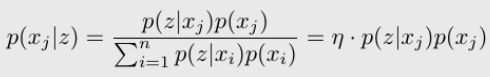

먼저 normalizer $\eta$를 고려하지 않고, $p(SO|O)p(O)$와 $p(SO|C)p(C)$를 계산해 봅시다.

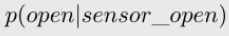

In [ ]:
################## Fill Your Code! ##################
# without eta
p_O_SO = p_SO_O*p_O
#####################################################

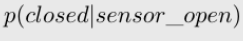

In [ ]:
################## Fill Your Code! ##################
# without eta
p_C_SO = p_SO_C*p_O
#####################################################

다음으로 normalizer $\eta$를 계산하고, 반영하여 p(O|SO)와 p(C|SO) 확률을 계산합니다.

In [ ]:
################## Fill Your Code! ##################
# compute eta
eta = 1/(p_O_SO + p_C_SO)

# normalize
p_O_SO = eta*p_O_SO
p_C_SO = eta*p_C_SO
#####################################################

print("p(open) = " + str(p_O))
print("p(open|sensor_open) = " + str(p_O_SO))
print("p(closed|sensor_open) = " + str(p_C_SO))

p(open) = 0.5
p(open|sensor_open) = 0.7777777777777778
p(closed|sensor_open) = 0.22222222222222224


#  3.State Transition Model (without Control)

### 3.1 예제1 : Coin Tossing 예제


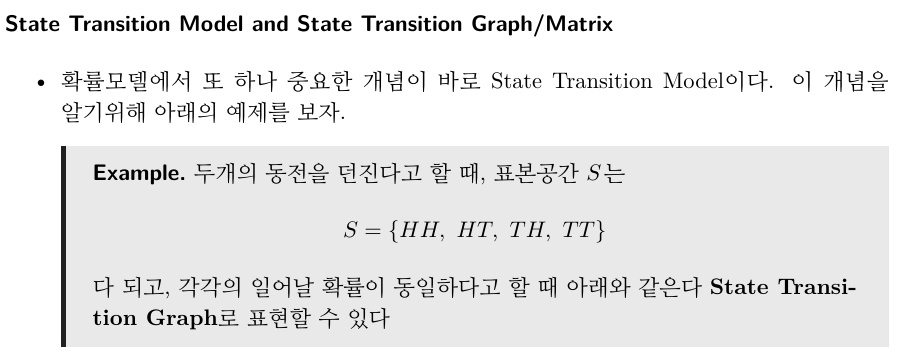
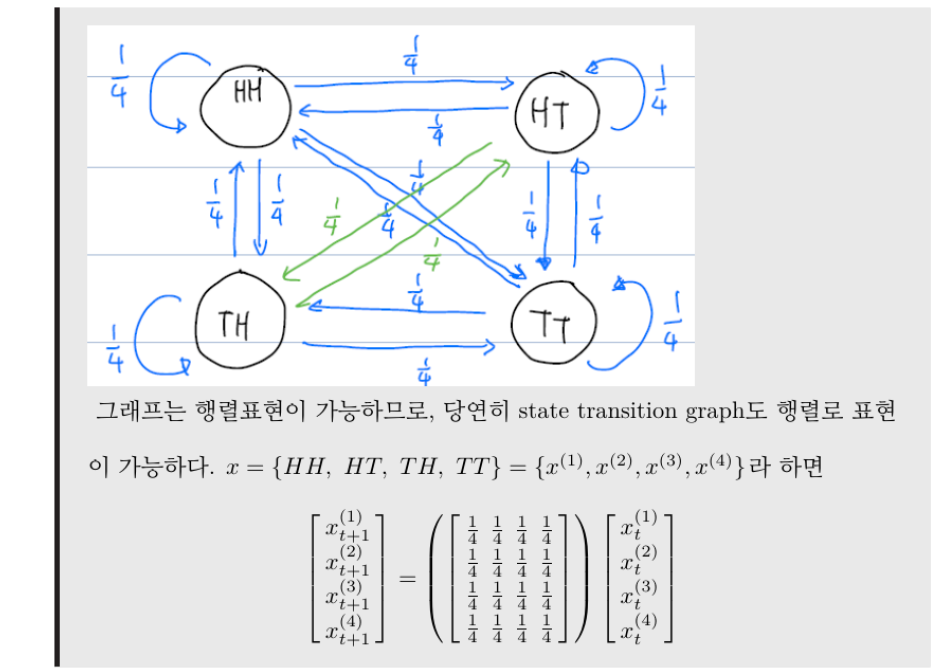

- State set $X = \{HH, HT, TH, TT\}$

- State transition probability matrix $P_{x'x}$
  - $p(x_{t+1}=HH | x_{t}=HH) = 1/4$
  - $p(x_{t+1}=HT | x_{t}=HH) = 1/4$
  - $p(x_{t+1}=TH | x_{t}=HH) = 1/4$
  - $p(x_{t+1}=TT | x_{t}=HH) = 1/4$
  - $…$

**Belief**는 **state에 대한 확률**로 정의하며, 아래와 같이 쓸 수 있다.

---
$bel(x_t) = p(x_t)$

$bel \in \mathbb{R}^{|X|}$

---

In [ ]:
import numpy as np
################## Fill Your Code! ##################
# Belief Initialization (Uniform)
bel = 1/4*np.ones((4,1))
#####################################################
print(bel)

[[0.25]
 [0.25]
 [0.25]
 [0.25]]


**State transition matrix $P_{x'x}$**의 경우 **이전 state $x_t$에서 다음 state $x_{t+1}$로 갈 확률 $p(x_{t+1} | x_t)$**을 엔트리로 갖는 매트릭스를 말한다.

이 때, 엔트리는 다음과 같이 계산된다.

---
$P_{ij} = p(x_{t+1}= i| x_t=j)$

---

이번 예제에서는, 모든 state transition probability가 1/4이다.

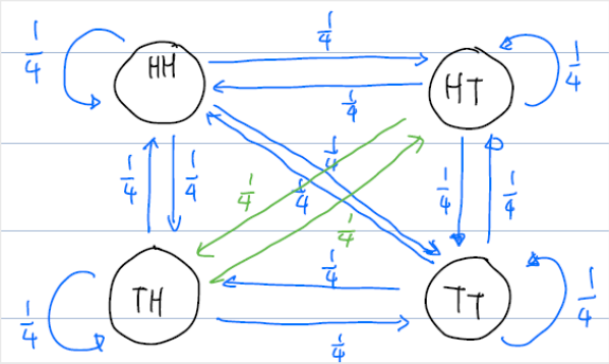

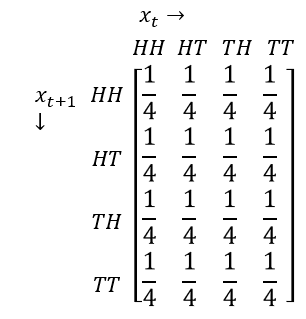

In [ ]:
################## Fill Your Code! ##################
# Define State Transition Matrix
P = 1/4 * np.ones((4,4))
#####################################################
print(P)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


그렇다면, state transition이 1번 일어났을 때, 각 **state들의 확률**은 어떻게 계산할 수 있을까?

$bel(x_{t})$과 $bel(x_{t+1})$ 사이의 관계는 state transition probability를 사용하여 표현하면 아래와 같다.

---
 $bel(x_{t+1}) =  \sum_{x_{t}}^{} p(x_{t+1}|x_{t}) bel(x_{t})$

---

---
참조 :
$P_{ij} = p(x_{t+1}= i| x_t=j)$

---

In [ ]:
bel_pre = bel.copy()
################## Fill Your Code! ##################
# Without State Transition Matrix
# State Transition
bel = np.zeros_like(bel_pre)
for i in range(4):
  for j in range(4):
    bel[i] += P[i,j]*bel_pre[j]
#####################################################
print(bel)

[[0.25]
 [0.25]
 [0.25]
 [0.25]]


사실, 위 연산은 **매트릭스, 벡터 곱**으로 훨씬 쉽게 수행할 수 있다.

In [ ]:
################## Fill Your Code! ##################
# With State Transition Matrix
# State Transition
bel = np.zeros_like(bel_pre)
bel = P @ bel_pre
#####################################################
print(bel)

[[0.25]
 [0.25]
 [0.25]
 [0.25]]


### 3.2 예제2 : Weather Transition 예제

앞선 예제에서는 모든 state transition probability가 0.25였지만, 이번에는 다른 확률 값을 갖는 예제이다.

아래 **Markov Chain**은 날씨를 state로 갖고, 날씨의 변화 확률을 state transition probability으로 하는 예제를 보여준다.

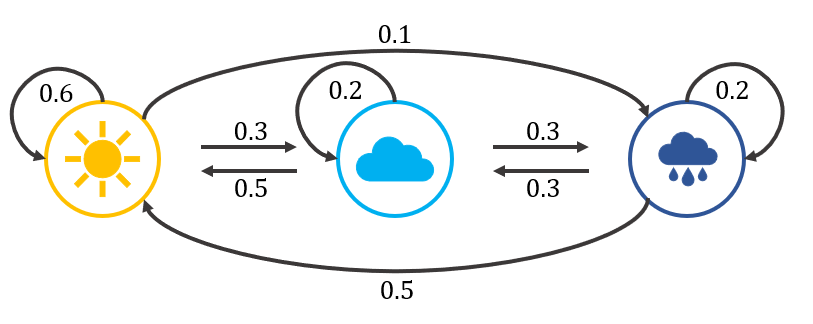

- State set $X = \{Sunny, Cloudy, Rainy\}=\{S,C,R\}$
- State transition probability $P_{x'x}$
  - $p(x_{t+1}=S | x_{t}=S) = 0.6$
  - $p(x_{t+1}=C  | x_{t}=S) = 0.3$
  - $p(x_{t+1}=R | x_{t}=S) = 0.1$
  - $p(x_{t+1}=S | x_{t}=C) = 0.5$
  - $p(x_{t+1}=C  | x_{t}=C) = 0.2$
  - $p(x_{t+1}=R | x_{t}=C) = 0.3$
  - $p(x_{t+1}=S | x_{t}=R) = 0.5$
  - $p(x_{t+1}=C  | x_{t}=R) = 0.3$
  - $p(x_{t+1}=R | x_{t}=R) = 0.2$




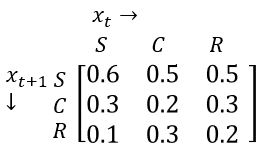

In [ ]:
import numpy as np
################## Fill Your Code! ##################
# Belief Initialization
#bel = 1/3*np.ones((3,1))
bel = [[0.5],[0.25],[0.25]]
print(bel)
print()

# Define State Transition Matrix
P_xx = np.zeros((3,3))
P_xx[0,0] = 0.5; P_xx[0,1] = 0.5; P_xx[0,2] = 0.5;
P_xx[1,0] = 0.25; P_xx[1,1] = 0.25; P_xx[1,2] = 0.25;
P_xx[2,0] = 0.25; P_xx[2,1] = 0.25; P_xx[2,2] = 0.25;
#####################################################
print(P_xx)

[[0.5], [0.25], [0.25]]

[[0.5  0.5  0.5 ]
 [0.25 0.25 0.25]
 [0.25 0.25 0.25]]


In [ ]:
################## Fill Your Code! ##################
# With State Transition Matrix
# State Transition
bel = P_xx@bel
#####################################################
print(bel)

[[0.5 ]
 [0.25]
 [0.25]]


In [ ]:
################## Fill Your Code! ##################
# State Transition Iteration
for i in range(1000):
 bel = P_xx@bel
#####################################################
print(bel.T)

[[0.5  0.25 0.25]]


# 4.Hidden Markov Model (without Control)

지금까지 Measurement model과 state transition model을 살펴본 이유는, hidden markov model(HMM)을 이해하기 위함이다.

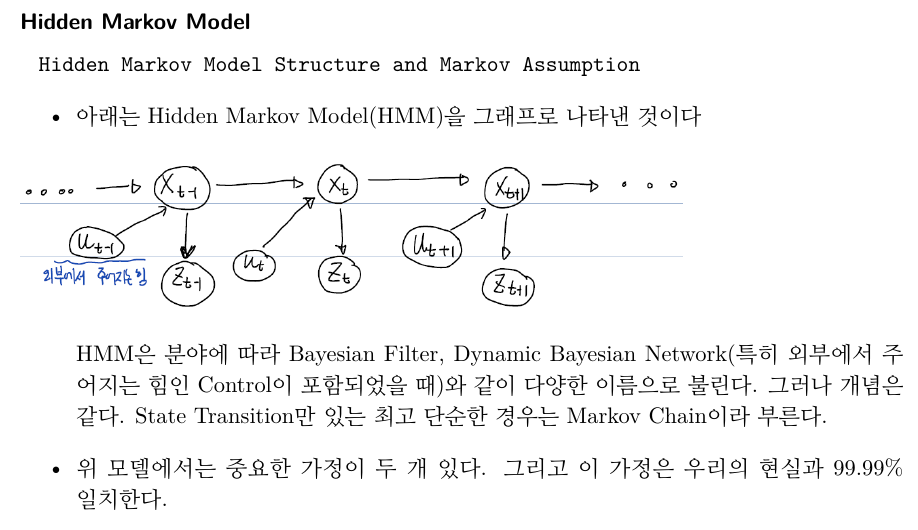

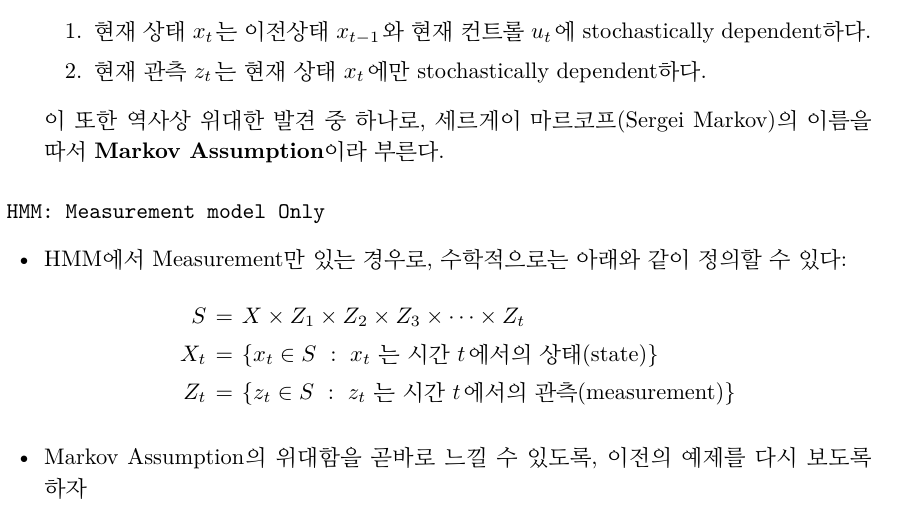

### 4.1 예제1 : 문은 몇 퍼센트 확률로 열려있을까? (관측 n회)

센서를 통해 $sensor\_open$이라는 값을 2번 연속 받았다. 실제로 문의 상태에 대한 확률은 어떻게 변할까?

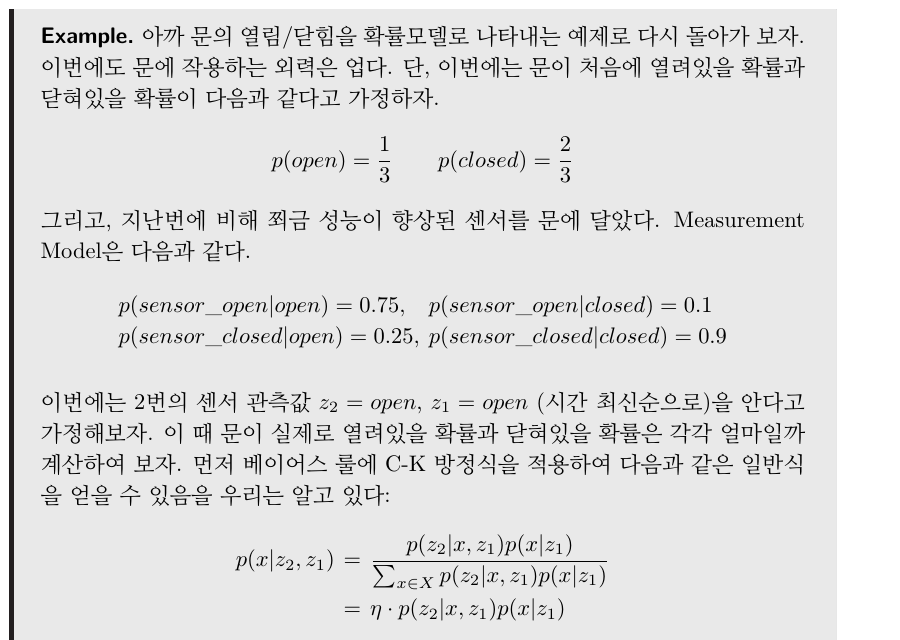

- State set $X = \{open, closed\}=\{O, C\}$

- Observation set $Z = \{sensor\_open, sensor\_closed\}=\{SO, SC\}$

- Measurement model $P_{zx}$
  - $p(z_{t}=SO | x_{t}=O) = 0.75$
  - $p(z_{t}=SC | x_{t}=O) = 0.25$
  - $p(z_{t}=SO | x_{t}=C) = 0.1$
  - $p(z_{t}=SC | x_{t}=C) = 0.9$

In [ ]:
# Measurement Model
p_SO_O = 0.75
p_SC_O = 0.25
p_SO_C = 0.1
p_SC_C =0.9

# Initial State Probability
p_O = 0.5
p_C = 0.5

#### 4.1.1 2회 관측

$z_{1:2}=\{sensor\_open, sensor\_open\}$

로 관측이 진행된다면, 아래 확률은 어떻게 변할가?

- p(O|SO, SO) = ?
- p(C|SO, SO) = ?

아래 Bayes' Rule에 따라 계산을 진행해보자.**(C-K 방정식, Markov Assumption)**

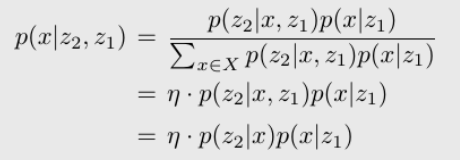

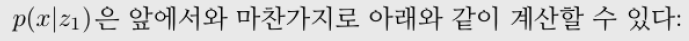

In [ ]:
################## Fill Your Code! ##################
# without eta1
p_O_SO = p_SO_O * p_O
p_C_SO = p_SO_C * p_C

# compute eta
eta1 = 1 / (p_O_SO + p_C_SO)

# normalize
p_O_SO = eta1 * p_O_SO
p_C_SO = eta1 * p_C_SO
#####################################################

print("p(open) = " + str(p_O))
print("p(open|sensor_open) = " + str(p_O_SO))

p(open) = 0.5
p(open|sensor_open) = 0.8823529411764706


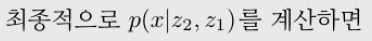

In [ ]:
################## Fill Your Code! ##################
# without eta2
p_O_SOSO = p_SO_O * p_O_SO
p_C_SOSO = p_SO_C * p_C_SO

# compute eta2
eta2 = 1/(p_O_SOSO + p_C_SOSO)

# normalize
p_O_SOSO = eta2*p_O_SOSO
p_C_SOSO = eta2*p_C_SOSO
#####################################################

print("p(open) = " + str(p_O))
print("p(open|sensor_open) = " + str(p_O_SO))
print("p(open|sensor_open,sensor_open) = " + str(p_O_SOSO))

p(open) = 0.5
p(open|sensor_open) = 0.8823529411764706
p(open|sensor_open,sensor_open) = 0.9825327510917031


#### 4.1.2 5회 관측

$z_{1:5}=\{sensor\_open, sensor\_closed, sensor\_closed, sensor\_open, sensor\_open\}$

로 관측이 진행된다면, 각 시간에서의 $p(open|z_{1:n})$의 확률은 어떻게 변할가?

이를 **measurement model**의 개념과 **state transition probability**의 개념을 사용해 풀어보자.

- State set $X = \{open, closed\}=\{O, C\}$
- Observation set $Z = \{sensor\_open, sensor\_closed\}=\{SO, SC\}$

- Measurement model $P_{zx}$
  - $p(z_{t}=SO | x_{t}=O) = 0.75$
  - $p(z_{t}=SC | x_{t}=O) = 0.25$
  - $p(z_{t}=SO | x_{t}=C) = 0.1$
  - $p(z_{t}=SC | x_{t}=C) = 0.9$

- State transition probability $P_{x'x}$
  - $p(x_{t+1}=O | x_{t}=O) = 1$
  - $p(x_{t+1}=C  | x_{t}=O) = 0$
  - $p(x_{t+1}=O | x_{t}=C) = 0$
  - $p(x_{t+1}=C | x_{t}=C) = 1$

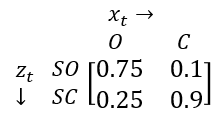

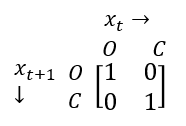

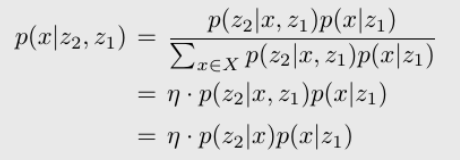

In [ ]:
################## Fill Your Code! ##################
# Define Measurement Model Matrix
P_zx = np.array([ [0.75,  0.1],
                  [0.25,  0.9]])

# Define State Transition Matrix
P_xx = np.array([ [1, 0],
                  [0, 1]])

# Initial State Probability(Belief)
bel = np.ones((2,1))
bel = bel/np.sum(bel)

# Observation Sequence
obs = [0, 1, 1, 0, 0]
#obs = [0,0] #0 is open
# State Transition with Observation
for i in range(len(obs)):
  bel = P_xx@bel
  bel = P_zx[obs[i],:].reshape((2,1)) *bel
  bel = bel/np.sum(bel)     # normalization
  print(bel[0])             # Open 확률 #1행 p(o|s_o) 2행 p(o|s_o,s_o)
#####################################################

[0.88235294]
[0.67567568]
[0.36656891]
[0.81274382]
[0.97019559]


### 4.2 예제2 : Weather Transition + Measurement 예제

3.2에서 보았던 weather transition 예제에서 measurement가 추가된 예제이다.

**State**는 여전히 날씨이고, **state transition probability**도 변함이 없다.

**Observation**는 어떤 조교의 기분이라고 하자.

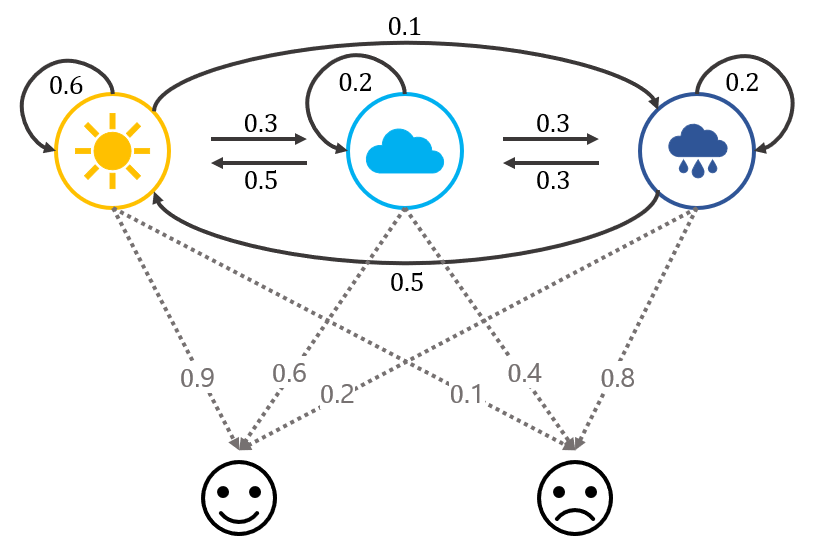

- State set $X = \{Sunny, Cloudy, Rainy\}=\{S,C,R\}$
- Observation set $Z = \{Happy, Angry\}=\{H, A\}$
- State transition probability $P_{x'x}$
  - $p(x_{t+1}=S | x_{t}=S) = 0.6$
  - $p(x_{t+1}=C  | x_{t}=S) = 0.3$
  - $p(x_{t+1}=R | x_{t}=S) = 0.1$
  - $p(x_{t+1}=S | x_{t}=C) = 0.5$
  - $p(x_{t+1}=C  | x_{t}=C) = 0.2$
  - $p(x_{t+1}=R | x_{t}=C) = 0.3$
  - $p(x_{t+1}=S | x_{t}=R) = 0.5$
  - $p(x_{t+1}=C  | x_{t}=R) = 0.3$
  - $p(x_{t+1}=R | x_{t}=R) = 0.2$

- Measurement model $P_{zx}$
  - $p(z_{t}=H | x_{t}=S) = 0.9$
  - $p(z_{t}=A | x_{t}=S) = 0.1$
  - $p(z_{t}=H | x_{t}=C) = 0.6$
  - $p(z_{t}=A | x_{t}=C) = 0.4$
  - $p(z_{t}=H | x_{t}=R) = 0.2$
  - $p(z_{t}=A | x_{t}=R) = 0.8$

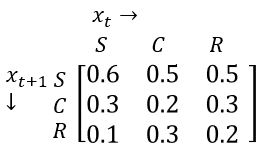

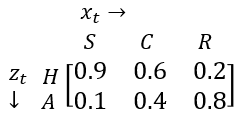

위에서 정의한 Weather model을 사용해, HMM에서 주로 다루는 문제 몇가지를 풀어보려 한다.

#### 4.2.1 The Evaluation Problem

이 문제는 사실 4.1 예제를 통해 다루었던 문제이며, $z_{1:n},P_{x'x}, P_{zx}$을 알고 있을 때, belief $bel(x)$를 구하는 문제이다.

- $V == Z$ : Observation sequence
- $α_t == bel_t$ : Belief
- $a_{ij} == P_{x'x}$ : State transition probability
- $b_{jk} == P_{zx}$ : Measurement model


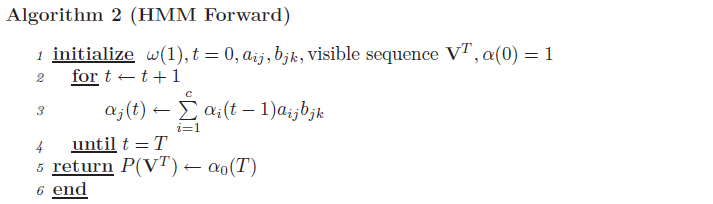

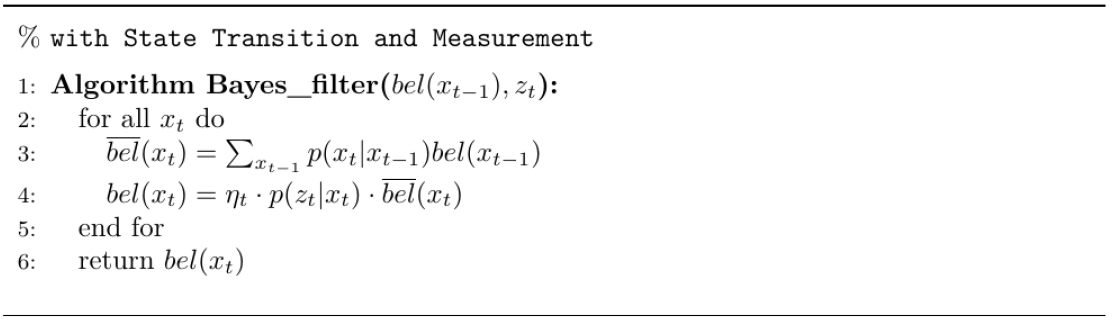

In [ ]:
import numpy as np
np.set_printoptions(9)
################## Fill Your Code! ##################
# Define State Transition Matrix
P_xx = np.zeros((3,3))
P_xx[0,0] = 0.6; P_xx[1,0] = 0.3; P_xx[2,0] = 0.1
P_xx[0,1] = 0.5; P_xx[1,1] = 0.2; P_xx[2,1] = 0.3
P_xx[0,2] = 0.5; P_xx[1,2] = 0.3; P_xx[2,2] = 0.2

# Define Measurement Model Matrix
P_zx = np.zeros((2,3))
P_zx[0,0] = 0.9; P_zx[0,1] = 0.6; P_zx[0,2] = 0.2;
P_zx[1,0] = 0.1; P_zx[1,1] = 0.4; P_zx[1,2] = 0.8;

# Observation Sequence
# H A A H H
obs = [0, 1, 1, 0, 0]

# Belief Initialization
bel = np.ones((3,1))
bel = bel/np.sum(bel)

# State Transition with Observation
print("     Sunny      Cloudy      Rainy")
for i in range(len(obs)):
  bel = P_xx@bel
  bel = P_zx[obs[i],:].reshape((3,1)) *bel
  bel = bel/np.sum(bel)
  print(bel.T)   # State(날씨) 확률
#####################################################

     Sunny      Cloudy      Rainy
[[0.705882353 0.235294118 0.058823529]]
[[0.196754564 0.381338742 0.421906694]]
[[0.156773957 0.315995594 0.527230449]]
[[0.694427353 0.240957634 0.064615013]]
[[0.72287586  0.233496715 0.043627425]]


#### 4.2.2 The Decoding Problem

$z_{1:n},P_{x'x}, P_{zx}$가 주어졌을 때, $z_{1:n}$가 나오게 하는 $x_{1:n}$를 구하는 문제이다.

Evaluation Problem의 $bel(x)$에서 max를 취해, state를 확정한다 생각하면 된다.

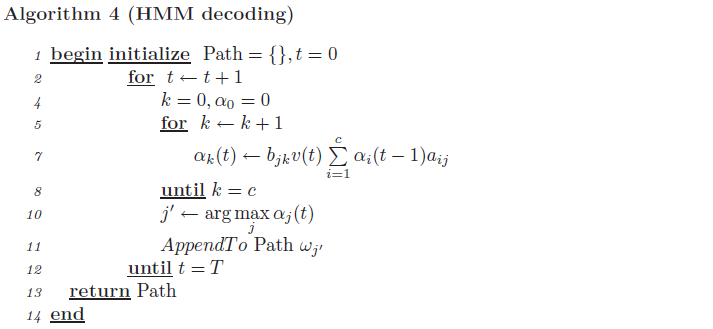

- Path : Sequence of state
- $w == x$ : State
- $v == z$ : Observation
- $α_t == bel_t$ : Belief
- $a_{ij} == P_{x'x}$ : State transition probability (ij 순서 반대)
- $b_{jk} == P_{zx}$ : Measurement model (ij 순서 반대)


In [ ]:
import numpy as np
np.set_printoptions(9)
################## Fill Your Code! ##################
# Define State Transition Matrix
P_xx = np.zeros((3,3))
P_xx[0,0] = 0.6; P_xx[1,0] = 0.3; P_xx[2,0] = 0.1
P_xx[0,1] = 0.5; P_xx[1,1] = 0.2; P_xx[2,1] = 0.3
P_xx[0,2] = 0.5; P_xx[1,2] = 0.3; P_xx[2,2] = 0.2

# Define Measurement Model Matrix
P_zx = np.zeros((2,3))
P_zx[0,0] = 0.9; P_zx[0,1] = 0.6; P_zx[0,2] = 0.2;
P_zx[1,0] = 0.1; P_zx[1,1] = 0.4; P_zx[1,2] = 0.8;

# Observation Sequence
# H A A H H
obs = [0, 1, 1, 0, 0]

# Belief Initialization
bel = np.ones((3,1))
bel = bel/np.sum(bel)

# State Transition with Observation
Path = []
for i in range(len(obs)):
  bel = P_xx@bel
  bel = P_zx[obs[i],:].reshape((3,1)) *bel
  bel = bel/np.sum(bel)
  j = np.argmax(bel)
  Path.append(j)
#####################################################
print(Path)

[0, 2, 2, 0, 0]


### 4.3 HMM의 한계와 RNN의 필요

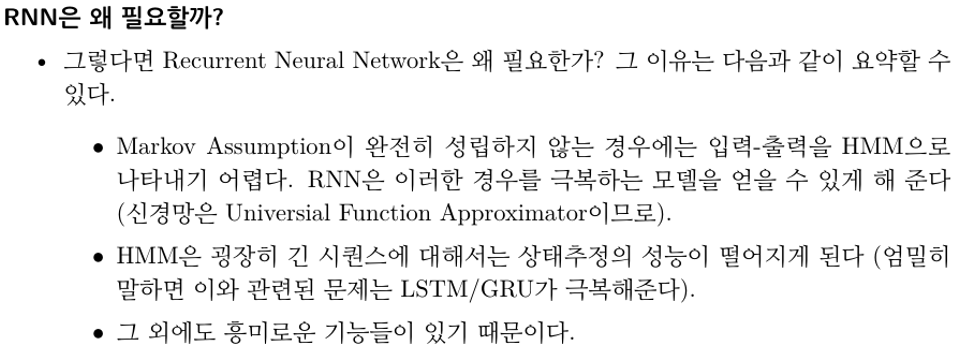

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np

def forward_algorithm(pi, A, B, observations):
    T = len(observations)
    N = len(pi)

    # Step 1: Initialization
    alpha = np.zeros((T, N))
    alpha[0, :] = pi * B[:, observations[0]]

    # Step 2: Recursion
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(alpha[t-1, :] * A[:, j]) * B[j, observations[t]]

    # Step 3: Termination
    P_O_given_lambda = np.sum(alpha[-1, :])

    return P_O_given_lambda, alpha

# HMM 모델 파라미터 정의
pi = np.array([0.4, 0.3, 0.3])  # 초기 상태 확률
A = np.array([[0.5, 0.2, 0.3],   # 전이 확률 행렬
              [0.3, 0.5, 0.2],
              [0.2, 0.3, 0.5]])
B = np.array([[0.7, 0.1, 0.2],   # 방출 확률 행렬
              [0.1, 0.6, 0.3],
              [0.3, 0.2, 0.5]])

# 주어진 관측 데이터
observations = [0, 1, 2, 0, 1]

# Forward Algorithm을 사용하여 확률 계산
probability, alpha_matrix = forward_algorithm(pi, A, B, observations)

# 결과 출력
print(f"주어진 관측 데이터에 대한 확률: {probability}")
print("Forward Algorithm을 통한 확률 행렬:")
print(alpha_matrix)

주어진 관측 데이터에 대한 확률: 0.0030967322999999997
Forward Algorithm을 통한 확률 행렬:
[[0.28       0.03       0.09      ]
 [0.0167     0.0588     0.027     ]
 [0.006278   0.012252   0.015135  ]
 [0.00688912 0.00119221 0.00357039]
 [0.00045163 0.00182703 0.00081807]]


In [ ]:
import numpy as np
np.set_printoptions(9)
################## Fill Your Code! ##################
# Define State Transition Matrix
P_xx = np.zeros((3,3))
P_xx[0,0] = 0.6; P_xx[1,0] = 0.3; P_xx[2,0] = 0.1
P_xx[0,1] = 0.5; P_xx[1,1] = 0.2; P_xx[2,1] = 0.3
P_xx[0,2] = 0.5; P_xx[1,2] = 0.3; P_xx[2,2] = 0.2

# Define Measurement Model Matrix
P_zx = np.zeros((2,3))
P_zx[0,0] = 0.9; P_zx[0,1] = 0.6; P_zx[0,2] = 0.2;
P_zx[1,0] = 0.1; P_zx[1,1] = 0.4; P_zx[1,2] = 0.8;

# Observation Sequence
# H A A H H
obs = [0, 1, 1, 0, 0]

# Belief Initialization
bel = np.ones((3,1))
bel = bel/np.sum(bel)

# State Transition with Observation
print("     Sunny      Cloudy      Rainy")
for i in range(len(obs)):
  bel = P_xx@bel
  bel = P_zx[obs[i],:].reshape((3,1)) *bel
  bel = bel/np.sum(bel)
  print(bel.T)   # State(날씨) 확률
#####################################################

     Sunny      Cloudy      Rainy
[[0.705882353 0.235294118 0.058823529]]
[[0.196754564 0.381338742 0.421906694]]
[[0.156773957 0.315995594 0.527230449]]
[[0.694427353 0.240957634 0.064615013]]
[[0.72287586  0.233496715 0.043627425]]


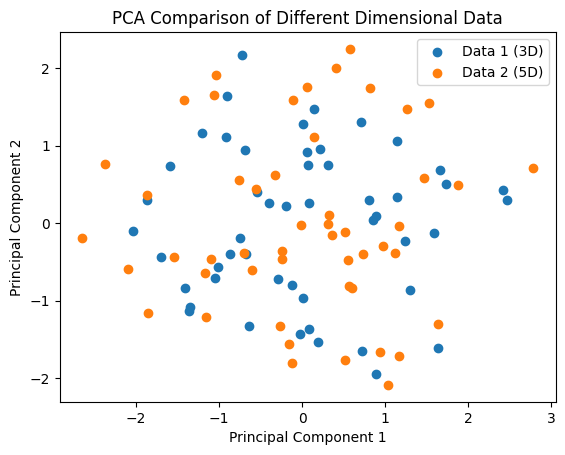

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 예시 데이터 생성
data1 = np.random.rand(50, 3)  # 3차원 데이터
data2 = np.random.rand(50, 5)  # 5차원 데이터

# 데이터 정규화
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

# PCA 적용
pca = PCA(n_components=2)  # 2개의 주성분 선택
data1_pca = pca.fit_transform(data1_scaled)
data2_pca = pca.fit_transform(data2_scaled)

# PCA 결과 시각화
import matplotlib.pyplot as plt

plt.scatter(data1_pca[:, 0], data1_pca[:, 1], label='Data 1 (3D)')
plt.scatter(data2_pca[:, 0], data2_pca[:, 1], label='Data 2 (5D)')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Comparison of Different Dimensional Data')
plt.show()

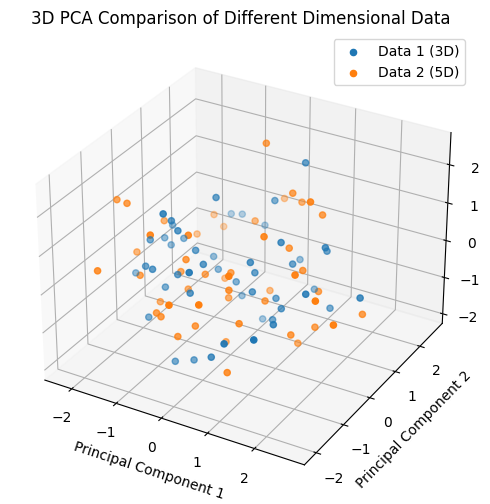

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 예시 데이터 생성
data1 = np.random.rand(50, 3)  # 3차원 데이터
data2 = np.random.rand(50, 5)  # 5차원 데이터

# 데이터 정규화
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

# PCA 적용
pca = PCA(n_components=3)  # 3개의 주성분 선택
data1_pca = pca.fit_transform(data1_scaled)
data2_pca = pca.fit_transform(data2_scaled)

# 3D 산점도 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data1_pca[:, 0], data1_pca[:, 1], data1_pca[:, 2], label='Data 1 (3D)')
ax.scatter(data2_pca[:, 0], data2_pca[:, 1], data2_pca[:, 2], label='Data 2 (5D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Comparison of Different Dimensional Data')
ax.legend()

plt.show()

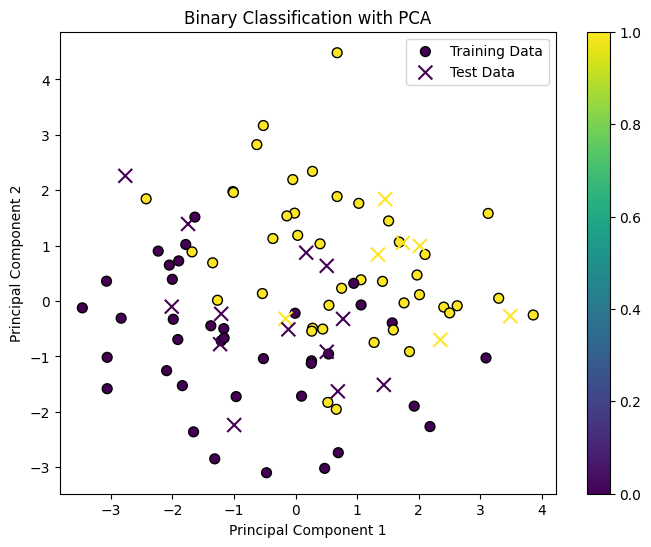

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 가상의 데이터 생성
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 이진 분류 결과 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Binary Classification with PCA')
plt.legend()
plt.colorbar(scatter)
plt.show()

In [ ]:
import numpy as np

# 4x4 행렬 생성 (가상의 데이터)
data = np.random.rand(4, 4)

# 데이터 정규화
mean = np.mean(data, axis=0)
normalized_data = data - mean

# 공분산 행렬 계산
covariance_matrix = np.cov(normalized_data, rowvar=False)

# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 주성분을 내림차순으로 정렬
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# 주성분 선택 (예를 들어, 처음 두 개의 주성분 선택)
num_components = 2
selected_eigenvectors = eigenvectors[:, :num_components]

# 주성분으로 데이터 변환
data_pca = np.dot(normalized_data, selected_eigenvectors)

# 결과 출력
print("Original Data:")
print(data)
print("\nPrincipal Components:")
print(selected_eigenvectors)
print("\nData after PCA:")
print(data_pca)

Original Data:
[[0.400763061 0.559640331 0.155240246 0.18192813 ]
 [0.861785621 0.946115462 0.373309316 0.270744673]
 [0.643999543 0.408734171 0.025386356 0.156152597]
 [0.715972229 0.658923942 0.027095993 0.221972162]]

Principal Components:
[[-0.496881935 -0.816441143]
 [-0.723359283  0.227325025]
 [-0.452629414  0.530761   ]
 [-0.15807057   0.006320896]]

Data after PCA:
[[ 0.186748924  0.194189156]
 [-0.434628988  0.021950797]
 [ 0.237898526 -0.107788167]
 [ 0.009981537 -0.108351786]]
